# Week 4 Individual Coding Assignment - Leslie Velasquez
In this week's assignment, I use what we have learned in class to begin exploring and working on my final project. I create an isochrone map of the areas within a 1/2 mile, or 10 minute walking distance, of a park in my neighborhood, and then use census data to map the racial makeup of the communities in that area. 

# 1. Creating an Isochrone Map of 10 Minute Walking Distance from Poinsettia Park

First, I need to import the libraries I will use for my isochrone map.

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx

Next, I need to input my place of study, Poinsettia Rec Center, the network type (walking), trip time (10 minutes), and travel speed (75 meters per minute). I also set my map distance to a 1600 meter radius from the park, which is approximately a mile. I use the G = command to download data from the open street network.

In [183]:
address = 'Poinsettia Recreation Center, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [10]
meters_per_minute = 75
G = ox.graph_from_address(address, network_type=network_type, dist = 1600)

Let's get a rough look of what the map looks like. 

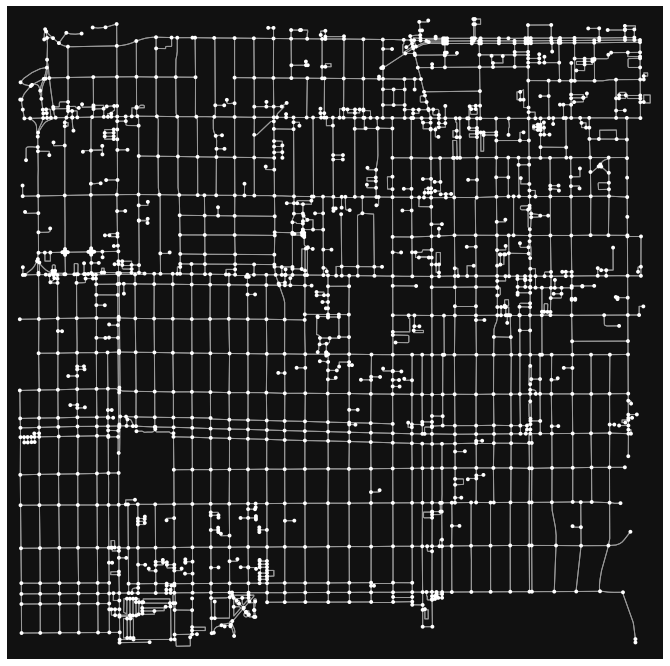

In [184]:
fig, ax = ox.plot_graph(G,figsize=(12,12))

I need to project my network data to Web Mercator in order to conduct spatial analysis. 

In [7]:
G = ox.project_graph(G, to_crs='epsg:3857')

Now I need to convert the nodes and edges of the map to geodataframes. 

In [8]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

Let's check out the nodes with both a table and a plot.

In [9]:
gdf_nodes

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
20842301,4.042206e+06,-1.317271e+07,stop,4,-118.332482,34.099764,POINT (-13172711.696 4042205.800)
6732079823,4.042280e+06,-1.317271e+07,NaN,3,-118.332486,34.100319,POINT (-13172712.108 4042280.451)
6788237108,4.042107e+06,-1.317271e+07,NaN,3,-118.332478,34.099029,POINT (-13172711.151 4042106.978)
2165116993,4.042206e+06,-1.317269e+07,NaN,3,-118.332285,34.099765,POINT (-13172689.688 4042205.921)
122874758,4.042205e+06,-1.317286e+07,NaN,3,-118.333828,34.099758,POINT (-13172861.465 4042204.913)
...,...,...,...,...,...,...,...
9409366423,4.041141e+06,-1.317627e+07,NaN,4,-118.364414,34.091847,POINT (-13176266.295 4041141.498)
9409366428,4.041142e+06,-1.317628e+07,NaN,4,-118.364504,34.091847,POINT (-13176276.336 4041141.552)
9409366420,4.041137e+06,-1.317625e+07,NaN,3,-118.364303,34.091812,POINT (-13176253.983 4041136.834)


<AxesSubplot:>

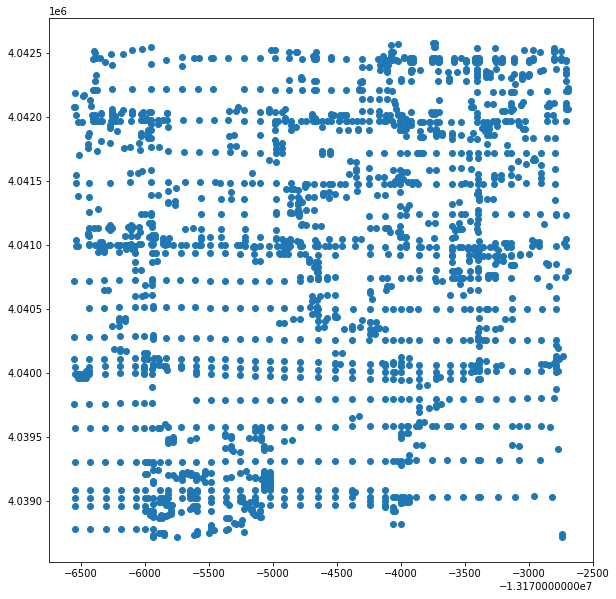

In [10]:
gdf_nodes.plot(figsize=(10,10))

Let's do the same with the edges.

In [11]:
gdf_edges

osmid                   name      highway  \
u          v          key                                                   
20842301   6732079823 0      13363214     Schrader Boulevard  residential   
           6788237108 0      13363214     Schrader Boulevard  residential   
           2165116993 0     437761841           Selma Avenue  residential   
           122874758  0     437761841           Selma Avenue  residential   
6732079823 20842301   0      13363214     Schrader Boulevard  residential   
...                               ...                    ...          ...   
9409423686 9409423695 0    1020203454          Norton Avenue  residential   
9409423693 9409423686 0    1020203447          Norton Avenue  residential   
           9409423680 0    1020203452          Norton Avenue  residential   
           9409423683 0    1020203453  North Hayworth Avenue  residential   
           9409423695 0    1020203458  North Hayworth Avenue  residential   

                           oneway   length  \
u          v          key                    
20842301   6732079823 0     False   61.748   
           6788237108 0     False   81.741   
           2165116993 0     False   18.204   
           122874758  0     False  123.882   
6732079823 20842301   0     False   61.748   
...                           ...      ...   
9409423686 9409423695 0     False   11.331   
9409423693 9409423686 0     False   11.714   
           9409423680 0     False    9.916   
           9409423683 0     False   14.034   
           9409423695 0     False    9.561   

                                                                    geometry  \
u          v          key                                                      
20842301   6732079823 0    LINESTRING (-13172711.696 4042205.800, -131727...   
           6788237108 0    LINESTRING (-13172711.696 4042205.800, -131727...   
           2165116993 0    LINESTRING (-13172711.696 4042205.800, -131726...   
           122874758  0    LINESTRING (-13172711.696 4042205.800, -131728...   
6732079823 20842301   0    LINESTRING (-13172712.108 4042280.451, -131727...   
...                                                                      ...   
9409423686 9409423695 0    LINESTRING (-13176127.179 4041139.186, -131761...   
9409423693 9409423686 0    LINESTRING (-13176115.178 4041145.101, -131761...   
           9409423680 0    LINESTRING (-13176115.178 4041145.101, -131761...   
           9409423683 0    LINESTRING (-13176115.178 4041145.101, -131761...   
           9409423695 0    LINESTRING (-13176115.178 4041145.101, -131761...   

                          service lanes maxspeed  ref access tunnel  \
u          v          key                                             
20842301   6732079823 0       NaN   NaN      NaN  NaN    NaN    NaN   
           6788237108 0       NaN   NaN      NaN  NaN    NaN    NaN   
           2165116993 0       NaN   NaN      NaN  NaN    NaN    NaN   
           122874758  0       NaN   NaN      NaN  NaN    NaN    NaN   
6732079823 20842301   0       NaN   NaN      NaN  NaN    NaN    NaN   
...                           ...   ...      ...  ...    ...    ...   
9409423686 9409423695 0       NaN   NaN      NaN  NaN    NaN    NaN   
9409423693 9409423686 0       NaN   NaN      NaN  NaN    NaN    NaN   
           9409423680 0       NaN   NaN      NaN  NaN    NaN    NaN   
           9409423683 0       NaN   NaN      NaN  NaN    NaN    NaN   
           9409423695 0       NaN   NaN      NaN  NaN    NaN    NaN   

                             junction  
u          v          key              
20842301   6732079823 0           NaN  
           6788237108 0           NaN  
           2165116993 0           NaN  
           122874758  0           NaN  
6732079823 20842301   0           NaN  
...                               ...  
9409423686 9409423695 0           NaN  
9409423693 9409423686 0           NaN  
           9409423680 0    roundabout  
           9409423683 0   

<AxesSubplot:>

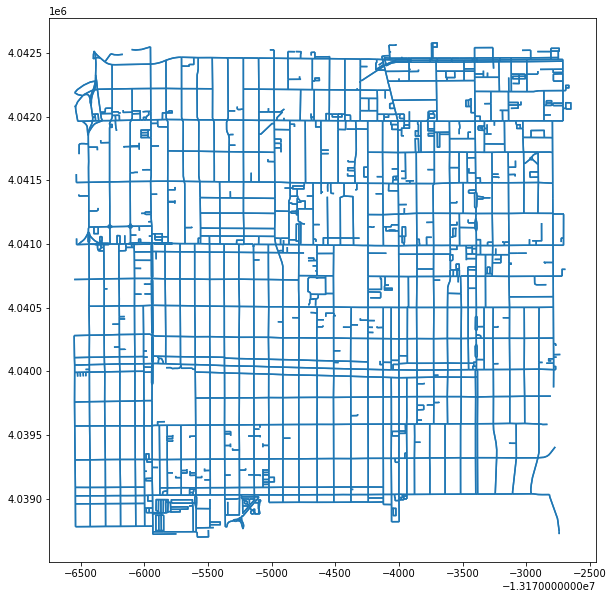

In [12]:
gdf_edges.plot(figsize=(10,10))

To create a centroid for my isochrone map, I will need to get the coordinates of the bounding box.

In [13]:
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13176551.528455483
4038720.348262429
-13172689.688340627
4042580.123413438


Now, I'll calculate the centroid.

In [14]:
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13174620.608398054
4040650.2358379336


I'm now going to find the node closest to the centroid and determine what record is associated with that node.

In [15]:
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print(str(center_node))

2512229008


In [16]:
gdf_nodes.loc[[center_node]]

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
2512229008,4.040605e+06,-1.317463e+07,NaN,3,-118.349747,34.087857,POINT (-13174633.605 4040605.198)


With this information, I'm going to create a plot of the area with the centroid. 

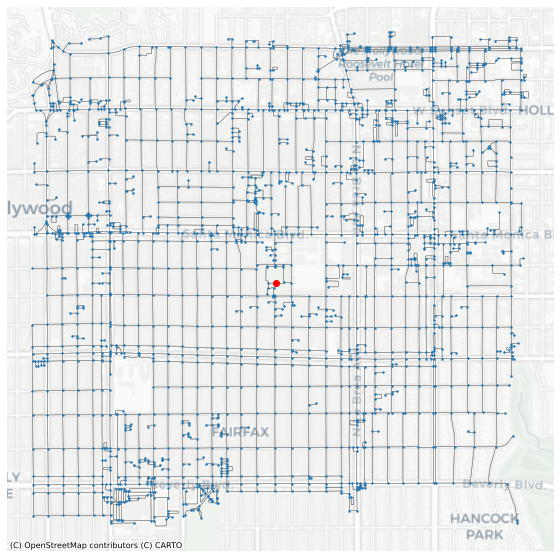

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)
ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

To create an isochrone map, I need to calculate the average time it would take someone to walk across an edge in this plotted area. I will use the following code to calculate that, creating a new column called walk time.

In [18]:
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

In [19]:
gdf_edges.head()

osmid                name      highway  oneway  \
u          v          key                                                       
20842301   6732079823 0     13363214  Schrader Boulevard  residential   False   
           6788237108 0     13363214  Schrader Boulevard  residential   False   
           2165116993 0    437761841        Selma Avenue  residential   False   
           122874758  0    437761841        Selma Avenue  residential   False   
6732079823 20842301   0     13363214  Schrader Boulevard  residential   False   

                            length  \
u          v          key            
20842301   6732079823 0     61.748   
           6788237108 0     81.741   
           2165116993 0     18.204   
           122874758  0    123.882   
6732079823 20842301   0     61.748   

                                                                    geometry  \
u          v          key                                                      
20842301   6732079823 0    LINESTRING (-13172711.696 4042205.800, -131727...   
           6788237108 0    LINESTRING (-13172711.696 4042205.800, -131727...   
           2165116993 0    LINESTRING (-13172711.696 4042205.800, -131726...   
           122874758  0    LINESTRING (-13172711.696 4042205.800, -131728...   
6732079823 20842301   0    LINESTRING (-13172712.108 4042280.451, -131727...   

                          service lanes maxspeed  ref access tunnel junction  \
u          v          key                                                      
20842301   6732079823 0       NaN   NaN      NaN  NaN    NaN    NaN      NaN   
           6788237108 0       NaN   NaN      NaN  NaN    NaN    NaN      NaN   
           2165116993 0       NaN   NaN      NaN  NaN    NaN    NaN      NaN   
           122874758  0       NaN   NaN      NaN  NaN    NaN    NaN      NaN   
6732079823 20842301   0       NaN   NaN      NaN  NaN    NaN    NaN      NaN   

                           walk_time  
u          v          key             
20842301   6732079823 0     0.823307  
           6788237108 0     1.089880  
           2165116993 0     0.242720  
           122874758  0     1.651760  
6732079823 20842301   0     0.823307

Now I will color code the isochrone map, assigning a color to the trip time I wish to study. I'm reversing the order of the color spectrum used in order to use a darker color. 

In [40]:
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='viridis', 
                                start=0, 
                                return_hex=True)

trip_times.sort(reverse=True)

time_color = list(zip(trip_times, iso_colors))
time_color

[(10, '#440154')]

Next, I'm assigning that color to all of the nodes that fall within the travel time I'm studying (10 minutes).

In [50]:
for time, color in list(time_color):

       subgraph = nx.ego_graph(G, center_node, radius=time)

for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color
        
gdf_nodes['color'].fillna('#cccccc', inplace=True)

Let's plot to see what the map with colored nodes looks like!

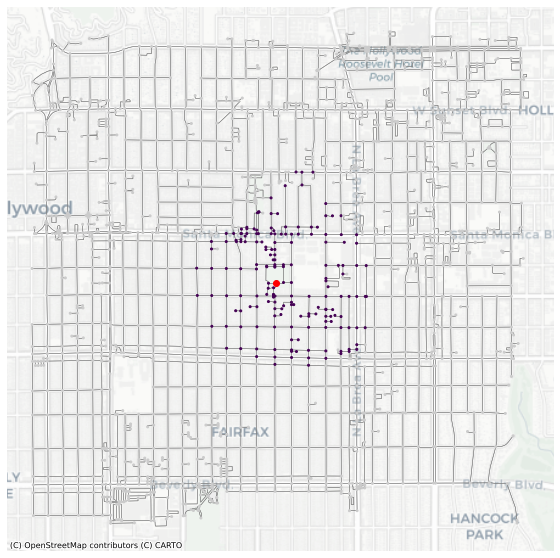

In [51]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

gdf_nodes.plot(ax=ax,
               color=gdf_nodes['color'],
               markersize=4, 
               zorder=20)

gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

Now I can finally create my isochrone map! I use the dissolve command to group all of the nodes within a 10 minute walking distance, use the convex hull command to create a polygon encompassing these nodes, and rename the columns in my data frame to make things easier to understand.

In [58]:
isochrones = gdf_nodes.dissolve("time")

isochrones = isochrones.convex_hull.reset_index()

isochrones.columns=['time','geometry']

isochrones.head()

,time,geometry
0,10 mins,"POLYGON ((-13174379.229 4039961.531, -13174643..."


It's time to plot the isochrone map.

<AxesSubplot:>

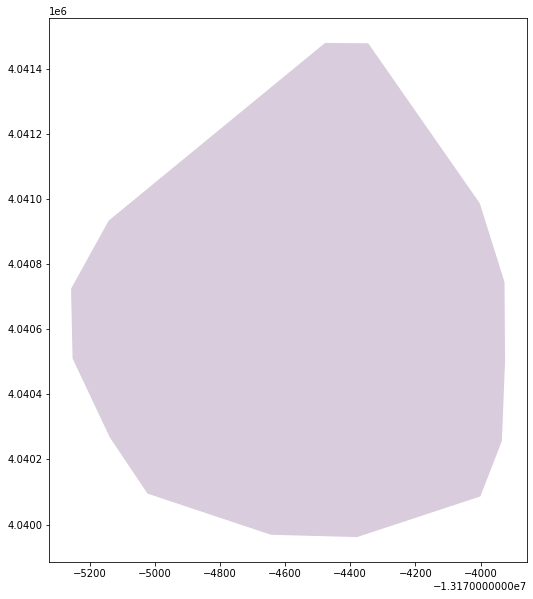

In [59]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='viridis')

It just looks like a blob! We need to combine this plot with the previous map of the neighborhood with its nodes and edges. This will fully show us what is within a 10 minute walking distance of Poinsettia Recreation Center.

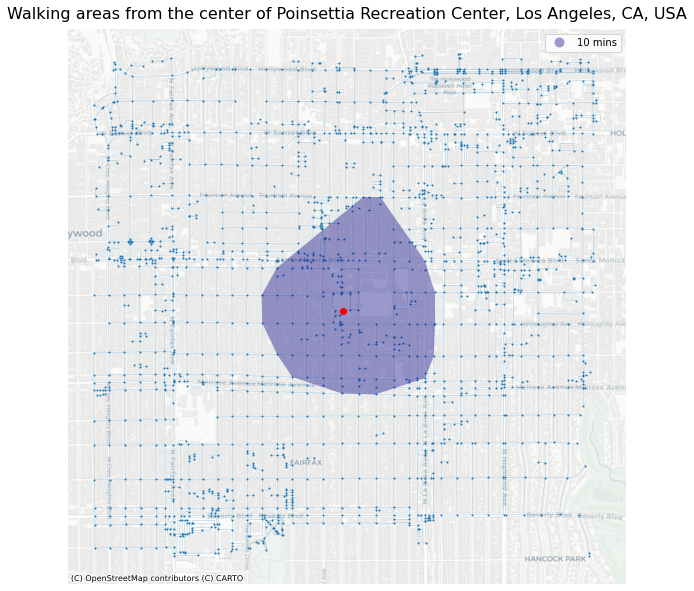

In [57]:
fig, ax = plt.subplots(figsize=(10,15))

isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

ax.axis('off')

ax.set_title('Walking areas from the center of ' + address,fontsize=16,pad=10)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# 2. Using Census Data to Analyze Racial Demographics of the Poinsettia Park Neighborhood

Now that my isochrone map is done, I'm going to load in my census data to analyze the  demographics of the communities within a 10 minute walking distance of Poinsettia Park.

In [185]:
gdf = gpd.read_file('acs2019_5yr_B03002_14000US06037222001.geojson')

I'm going to only include columns related to the populations of Non-Hispanic White/Black/Asian/Native/Pacific Islander/Multi Racial people and Hispanic people, in order to make analysis more simple.

In [61]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [65]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

gdf = gdf[columns_to_keep]

gdf.head(5)

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Next, I'm going to rename the columns, so I can understand what each represents. 

In [66]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [67]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

gdf.head(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Online, I looked up a map of Los Angeles census tracts and cross-compared it with my isochrone map to determine which census tracts were within a 10 minute walk of the park. I determined that the census within a 10 minute walking distance of Poinsettia were 1919.01, 1919.02, 1920.01, and 1920.02, along with two others that are in West Hollywood and not in the city of Los Angeles (our subject area). I search for each census tract in my dataframe by geoid, in order to determine the index number for each. 

In [99]:
gdf[gdf.geoid == '14000US06037191901']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
443,14000US06037191901,"Census Tract 1919.01, Los Angeles, CA",3060.0,2247.0,1731.0,234.0,0.0,147.0,0.0,0.0,135.0,813.0,"MULTIPOLYGON (((-118.34406 34.08889, -118.3440..."


In [98]:
gdf[gdf.geoid == '14000US06037191902']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
444,14000US06037191902,"Census Tract 1919.02, Los Angeles, CA",2788.0,2533.0,2200.0,18.0,1.0,179.0,0.0,12.0,123.0,255.0,"MULTIPOLYGON (((-118.34405 34.08708, -118.3427..."


In [100]:
gdf[gdf.geoid == '14000US06037192001']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
445,14000US06037192001,"Census Tract 1920.01, Los Angeles, CA",2370.0,2154.0,1691.0,156.0,28.0,210.0,0.0,7.0,62.0,216.0,"MULTIPOLYGON (((-118.35280 34.08896, -118.3522..."


In [112]:
gdf[gdf.geoid == '14000US06037192002']

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
446,14000US06037192002,"Census Tract 1920.02, Los Angeles, CA",2597.0,2414.0,1877.0,72.0,0.0,179.0,29.0,0.0,257.0,183.0,"MULTIPOLYGON (((-118.36146 34.08213, -118.3614..."


Now that I have the index number for each of these census tracts, I use a query command to trim my dataframe to only inlude these census tracts, in order to analyze the demographics of this specific area.

In [115]:
gdf_new = gdf.loc[[443, 444, 445, 446]]

In [116]:
gdf_new

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
443,14000US06037191901,"Census Tract 1919.01, Los Angeles, CA",3060.0,2247.0,1731.0,234.0,0.0,147.0,0.0,0.0,135.0,813.0,"MULTIPOLYGON (((-118.34406 34.08889, -118.3440..."
444,14000US06037191902,"Census Tract 1919.02, Los Angeles, CA",2788.0,2533.0,2200.0,18.0,1.0,179.0,0.0,12.0,123.0,255.0,"MULTIPOLYGON (((-118.34405 34.08708, -118.3427..."
445,14000US06037192001,"Census Tract 1920.01, Los Angeles, CA",2370.0,2154.0,1691.0,156.0,28.0,210.0,0.0,7.0,62.0,216.0,"MULTIPOLYGON (((-118.35280 34.08896, -118.3522..."
446,14000US06037192002,"Census Tract 1920.02, Los Angeles, CA",2597.0,2414.0,1877.0,72.0,0.0,179.0,29.0,0.0,257.0,183.0,"MULTIPOLYGON (((-118.36146 34.08213, -118.3614..."


Let's plot the census tracts!

<AxesSubplot:>

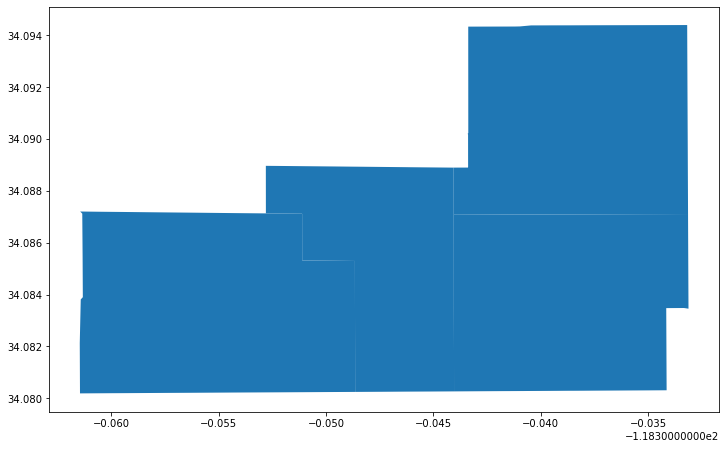

In [118]:
gdf_new.plot(figsize=(12,12))

I'm now going to calculate the percentage of each racial group within the populations of each census tract, adding a column to represent this calculation. 

In [119]:
list(gdf_new)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [120]:
gdf_new['Percent Non Hispanic'] = gdf_new['Non Hispanic']/gdf_new['Total']*100
gdf_new['Percent Hispanic'] = gdf_new['Hispanic']/gdf_new['Total']*100
gdf_new['Percent Non Hispanic White'] = gdf_new['Non Hispanic White']/gdf_new['Total']*100
gdf_new['Percent Non Hispanic Black'] = gdf_new['Non Hispanic Black']/gdf_new['Total']*100
gdf_new['Percent Non Hispanic American Indian and Alaska Native'] = gdf_new['Non Hispanic American Indian and Alaska Native']/gdf_new['Total']*100
gdf_new['Percent Non Hispanic Asian'] = gdf_new['Non Hispanic Asian']/gdf_new['Total']*100
gdf_new['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdf_new['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdf_new['Total']*100
gdf_new['Percent Non Hispanic Some other race'] = gdf_new['Non Hispanic Some other race']/gdf_new['Total']*100
gdf_new['Percent Non Hispanic Two or more races'] = gdf_new['Non Hispanic Two or more races']/gdf_new['Total']*100

In [121]:
gdf_new

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
443,14000US06037191901,"Census Tract 1919.01, Los Angeles, CA",3060.0,2247.0,1731.0,234.0,0.0,147.0,0.0,0.0,...,"MULTIPOLYGON (((-118.34406 34.08889, -118.3440...",73.431373,26.568627,56.568627,7.647059,0.000000,4.803922,0.000000,0.000000,4.411765
444,14000US06037191902,"Census Tract 1919.02, Los Angeles, CA",2788.0,2533.0,2200.0,18.0,1.0,179.0,0.0,12.0,...,"MULTIPOLYGON (((-118.34405 34.08708, -118.3427...",90.853659,9.146341,78.909613,0.645624,0.035868,6.420373,0.000000,0.430416,4.411765
445,14000US06037192001,"Census Tract 1920.01, Los Angeles, CA",2370.0,2154.0,1691.0,156.0,28.0,210.0,0.0,7.0,...,"MULTIPOLYGON (((-118.35280 34.08896, -118.3522...",90.886076,9.113924,71.350211,6.582278,1.181435,8.860759,0.000000,0.295359,2.616034
446,14000US06037192002,"Census Tract 1920.02, Los Angeles, CA",2597.0,2414.0,1877.0,72.0,0.0,179.0,29.0,0.0,...,"MULTIPOLYGON (((-118.36146 34.08213, -118.3614...",92.953408,7.046592,72.275703,2.772430,0.000000,6.892568,1.116673,0.000000,9.896034


I can now plot the percentages of major racial groups (Hispanic, Non Hispanic Black, Non Hispanic Asian, and Non Hispanic White) by census tract!

Text(0.5, 1.0, 'Percent Non Hispanic Black')

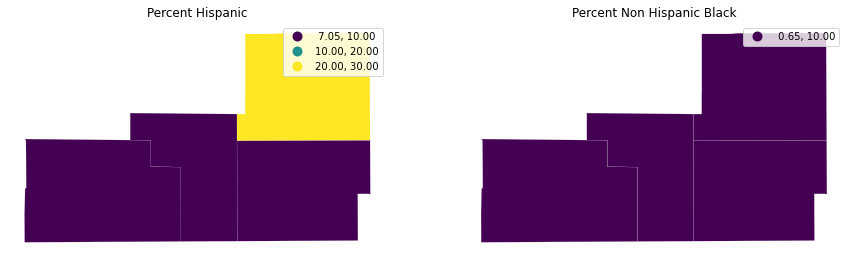

In [187]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

ax1, ax2 = axs

gdf_new.plot(column='Percent Hispanic', 
            cmap='viridis', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Hispanic")

gdf_new.plot(column='Percent Non Hispanic Black', 
            cmap='viridis', 
            scheme='user_defined',
            classification_kwds={'bins':[10]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic Black")

Text(0.5, 1.0, 'Percent Non Hispanic Asian')

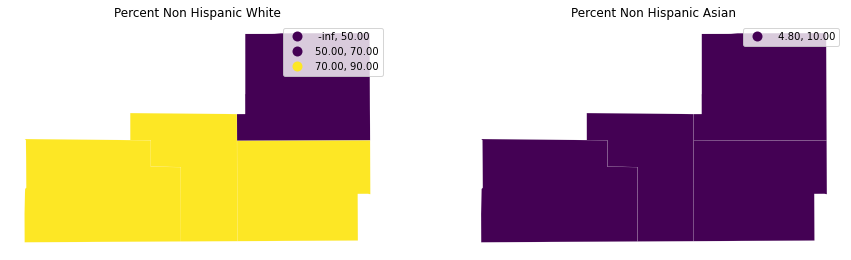

In [189]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

ax1, ax2 = axs

gdf_new.plot(column='Percent Non Hispanic White', 
            cmap='viridis', 
            scheme='user_defined',
            classification_kwds={'bins':[50,70,90]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Non Hispanic White")

gdf_new.plot(column='Percent Non Hispanic Asian', 
            cmap='viridis', 
            scheme='user_defined',
            classification_kwds={'bins':[10]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic Asian")

For my final project, I would like to be able to layer census data on race over the isochrone map in order to have a better comparison and fuller picture of the communities around parks. Additionally, I had some issues with the bins and colors in my census maps (if I had multiple bins they would get labeled the same color for some reason), so I would like to be able to present demographic information in a more consistent and cohesive way. 